In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from math import sqrt
from sklearn.metrics import mean_squared_error
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.model_selection import train_test_split

In [8]:
plt.rcParams['agg.path.chunksize'] = 1000

In [101]:
df = pd.read_csv(r"./result.csv", index_col = 'id_hash', parse_dates=['snap_date'])
df_days = df[[ 'snap_date', 'days']]
df_days = df_days.sort_values(by=['snap_date'])

/var/folders/z5/jgxbbstx6mb91k782w89hygr0000gn/T/ipykernel_2930/281156238.py:1: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"./result.csv", index_col = 'id_hash', parse_dates=['snap_date'])


In [102]:
df['snap_date'] = pd.to_datetime(df['snap_date'], format='%Y.%m.%d')

In [103]:
df

,Unnamed: 0,snap_date,days,home_region,tourists_region,city,gender,age,mou,mou_out,dou,interests,top_service,volume_sum,dl_volume_sum,ul_volume_sum
id_hash,,,,,,,,,,,,,,,,
61fc25d86364a6a5d6e85319bcf7aef5,0,2021-07-01,3,77,23,Абинск,1,47,33.512500,NaN,8.053427,NaN,NaN,NaN,NaN,NaN
c42fc8d3ad95a2e006567967814463a3,1,2021-07-01,15,61,23,Абинск,2,28,1738.257600,1029.315000,46874.117000,NaN,NaN,NaN,NaN,NaN
ce99dc79821948d73c0d2ab2d9eee25d,2,2021-07-01,5,34,23,Абинск,1,36,326.655000,173.512500,31097.098000,NaN,NaN,NaN,NaN,NaN
02db2c7539fb8a552f48b42e3096151f,3,2021-07-01,11,72,23,Абинск,2,34,165.549990,39.917496,2390.938200,NaN,NaN,NaN,NaN,NaN
d3fd4dd683cf977fabbf8804d4006dfe,4,2021-07-01,1,7,23,Абинск,2,33,1355.112500,469.910000,600.361100,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c0b834bfbe8e15eba36435a0ce4efce3,20463,2022-12-01,9,37,33,Юрьев-Польский,1,32,1503.110000,799.365000,7869.650400,"[Программное обеспечение, Фитнес, бег и здоров...",[dns],36511556.0,21255580.0,15255979.0
5075dfadc2d26829cbcd57efee491a41,20464,2022-12-01,7,77,33,Юрьев-Польский,1,41,1500.380000,693.490000,10923.867000,"[Государственный информационный портал, Банки,...",[yandex],174537520.0,104209784.0,70327744.0
9f234963e685808fc25f183d43287683,20465,2022-12-01,1,52,33,Юрьев-Польский,1,36,948.920000,705.635000,8897.451000,"[Навигация, Новости и СМИ, Боевые искусства]",[google],79503184.0,63466348.0,16036842.0


In [163]:
df_clean = df[['snap_date', 'days', 'city']]
df_clean.head()

,snap_date,days,city
id_hash,,,
61fc25d86364a6a5d6e85319bcf7aef5,2021-07-01,3,Абинск
c42fc8d3ad95a2e006567967814463a3,2021-07-01,15,Абинск
ce99dc79821948d73c0d2ab2d9eee25d,2021-07-01,5,Абинск
02db2c7539fb8a552f48b42e3096151f,2021-07-01,11,Абинск
d3fd4dd683cf977fabbf8804d4006dfe,2021-07-01,1,Абинск


In [164]:
df_clean.isnull().sum()

snap_date    0
days         0
city         0
dtype: int64

In [165]:
df_clean_scatter = df[['snap_date', 'days']]

In [166]:
df_clean = df_clean.groupby(df['snap_date'].dt.date)[['days']].count()

In [167]:
df_clean = df_clean.sort_values(by=['snap_date'])
df_clean 

,days
snap_date,
2021-01-01,101699
2021-02-01,104176
2021-03-01,140644
2021-04-01,163275
2021-05-01,227996
2021-06-01,496136
2021-07-01,732466
2021-08-01,704539
2021-09-01,625963


In [168]:
#df_clean.set_index('snap_date', inplace=True)
#df_clean.sort_index()
#print(df_clean.head())

In [169]:
rolling_mean = df_clean.rolling(7).mean()
rolling_std = df_clean.rolling(7).std()

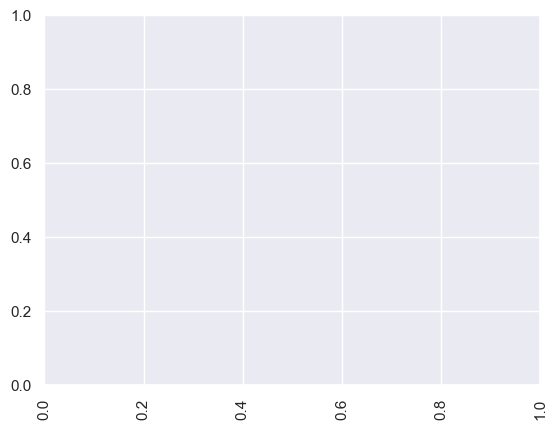

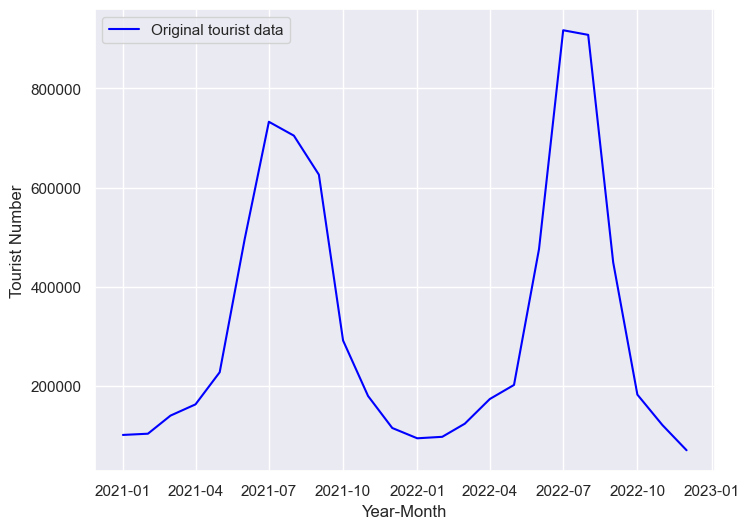

In [170]:
_ = plt.xticks(rotation=90)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df_clean, color="blue",label="Original tourist data")
plt.ylabel("Tourist Number")
plt.xlabel('Year-Month')
plt.legend()

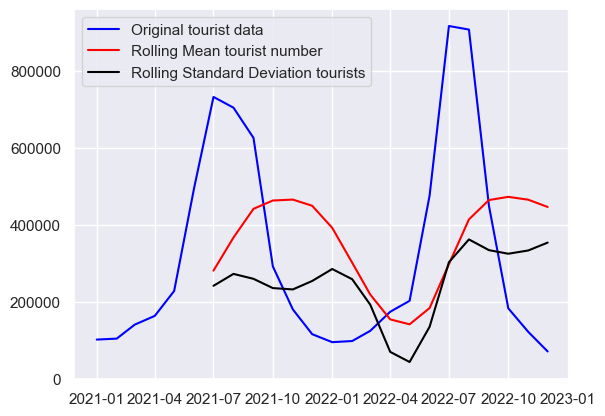

In [171]:
plt.plot(df_clean, color="blue",label="Original tourist data")
plt.plot(rolling_mean, color="red", label="Rolling Mean tourist number")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation tourists")
plt.legend(loc="best")

In [172]:
adft = adfuller(df_clean,autolag="AIC")
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

      Values                       Metric
0  -3.205318              Test Statistics
1   0.019679                      p-value
2   9.000000             No. of lags used
3  14.000000  Number of observations used
4  -4.012034          critical value (1%)
5  -3.104184          critical value (5%)
6  -2.690987         critical value (10%)


=> reject Nul hypothesis, data is stationary

In [173]:
autocorrelation_lag1 = df_clean['days'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

One Month Lag:  0.7473825626315135


In [174]:
autocorrelation_lag3 = df_clean['days'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = df_clean['days'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = df_clean['days'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

autocorrelation_lag12 = df_clean['days'].autocorr(lag=12)
print("Twelve Month Lag: ", autocorrelation_lag12)


Three Month Lag:  -0.2764128368061294
Six Month Lag:  -0.6780796153530771
Nine Month Lag:  0.020808164839368648
Twelve Month Lag:  0.9495561731236075


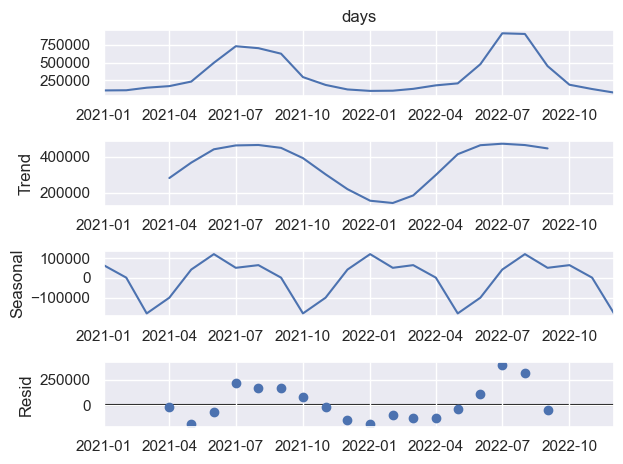

In [175]:
decompose = seasonal_decompose(df_clean['days'],model='additive', period=7)
decompose.plot()
plt.show()

In [176]:
df_clean

,days
snap_date,
2021-01-01,101699
2021-02-01,104176
2021-03-01,140644
2021-04-01,163275
2021-05-01,227996
2021-06-01,496136
2021-07-01,732466
2021-08-01,704539
2021-09-01,625963


In [177]:
df_clean.describe()

,days
count,24.000000
mean,320982.125000
std,271888.183629
min,70852.000000
25%,120169.500000
50%,181514.500000
75%,481052.750000
max,916845.000000


In [178]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2021-01-01 to 2022-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   days    24 non-null     int64
dtypes: int64(1)
memory usage: 384.0+ bytes


In [179]:
#train = df_count_perdate.iloc[:12]
#train['train'] = train['days']
#del train['days']
#test = df_count_perdate.tail(12)

In [180]:
df_count_perdate = df_days.groupby(df['snap_date'].dt.date)[['days']].count()
train = df_count_perdate.iloc[:-12]
train['train'] = train['days']
del train['days']
test = df_count_perdate.iloc[-12:]
test['test'] = test['days']
del test['days']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for tourist volume data")
plt.ylabel("Tourist Number")
plt.xlabel('Year-Month')
plt.legend()
plt.show()

KeyboardInterrupt: 

In [ ]:
from pmdarima.arima import auto_arima
model_1 = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model_1.fit(train)

#forecast = model.predict(n_periods=len(test))
#forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=334.894, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=326.335, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=329.912, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=345.646, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=320.400, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=321.562, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=324.730, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=325.074, Time=0.01 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=323.312, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=322.705, Time=0.01 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.215 seconds


ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True)

/Users/polina/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


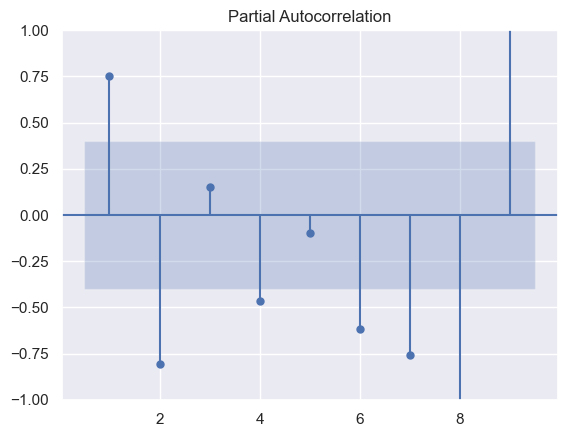

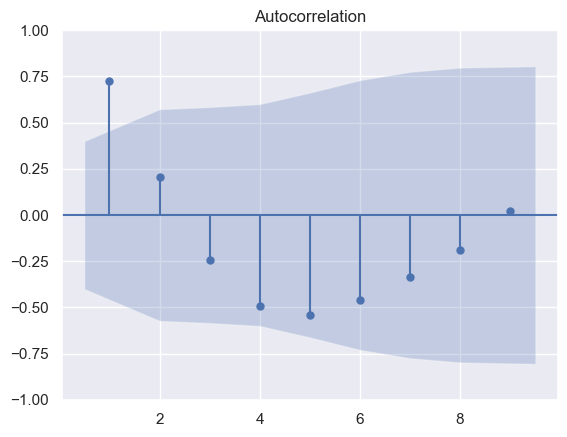

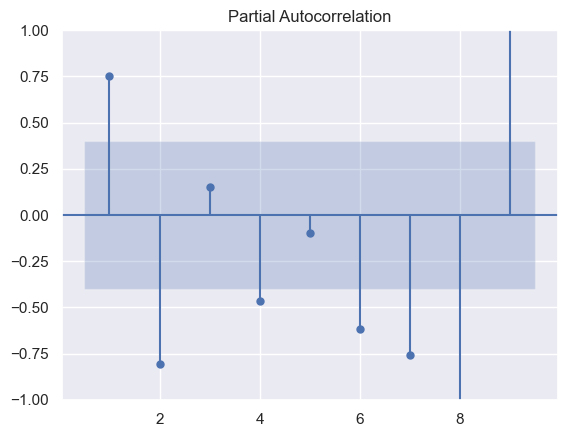

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_clean, lags = 9, zero=False)
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_clean, lags=9, zero=False)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(2,0,0))
model_fit= model.fit()

/Users/polina/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/polina/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/polina/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


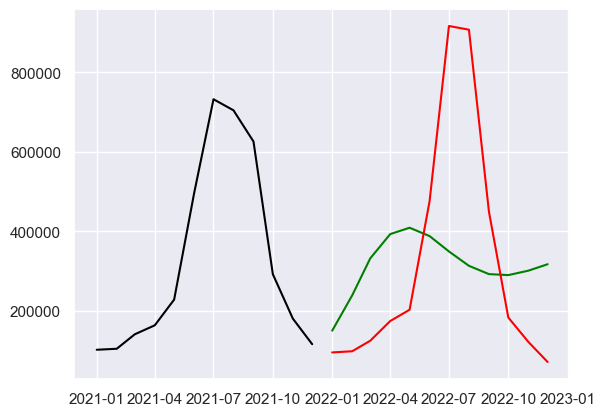

In [ ]:
predictions = model_fit.predict(start=test.index[0], end=test.index[-1])
plt.plot(predictions, color = "green")
plt.plot(test, color = "red")
plt.plot(train, color = "black")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
rms = sqrt(mean_squared_error(test, predictions))
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
print(f'MSE: {mse}, MAE: {mae}', "RMSE: ", rms)

MSE: 80723548113.59984, MAE: 230663.57561065405 RMSE:  284118.89784665825


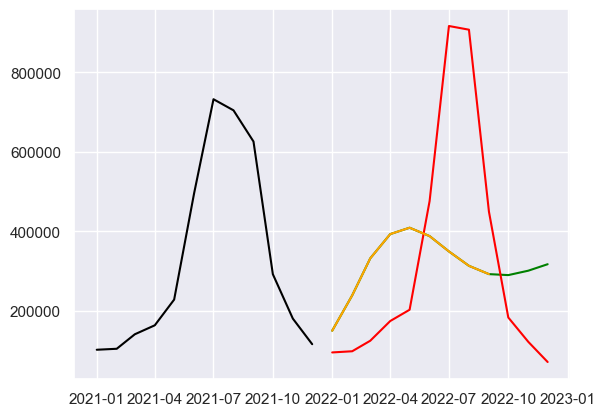

In [ ]:
forecast = model_fit.forecast(steps=36)
plt.plot(predictions, color = "green")
plt.plot(test, color = "red")
plt.plot(train, color = "black")
plt.plot(forecast, color='orange')

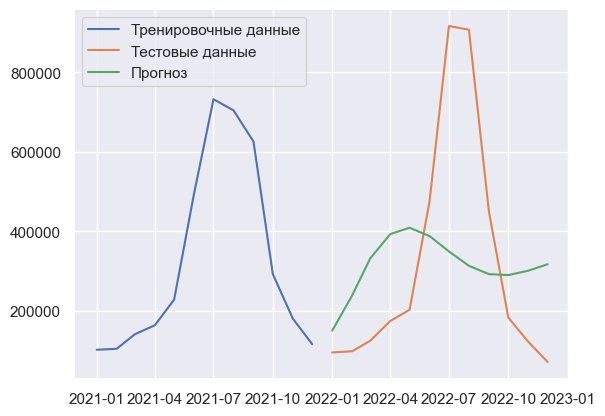

In [ ]:
plt.plot(train, label='Тренировочные данные')
plt.plot(test, label='Тестовые данные')
plt.plot(predictions, label='Прогноз')
plt.legend()




plt.show()

In [ ]:
#cf= pd.DataFrame(confint)

# Map of tourist volume
We can visualise the amount of tourists per city, and differentiate per year

In [ ]:
df_map = pd.read_csv(r"./result.csv", parse_dates=['snap_date'])

In [ ]:
df_map.columns

Index(['Unnamed: 0', 'snap_date', 'id_hash', 'days', 'home_region',
       'tourists_region', 'city', 'gender', 'age', 'mou', 'mou_out', 'dou',
       'interests', 'top_service', 'volume_sum', 'dl_volume_sum',
       'ul_volume_sum'],
      dtype='object')

In [ ]:
df_map_clean = df_map[['snap_date','tourists_region', 'city','gender','age']]

In [ ]:
df_map_clean.sample(5)

,snap_date,city,gender,age
4114954,2021-11-01,Петушки,1,36
7301822,2022-07-01,Туапсе,2,23
5154543,2022-05-01,Сириус,1,35
5713160,2022-07-01,Струнино,2,38
5414726,2021-03-01,Славянск-на-Кубани,1,35


In [ ]:
# Calculate supply (total per mill) = done
# Converted all deliveries at historic rate (in RUB) = done
# Check and remove outliers per destination
import seaborn as sns
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [ ]:
import geocoder
from pprint import pprint
key = '484ae73bfa5b43d28bde740af59c0c0c' # get api key from: https://opencagedata.com
cities = dict.fromkeys(df_map_clean['city'])
for name in cities:
    result = geocoder.opencage(name, key=key)
    cities[name] = result.latlng

Status code Unknown from http://api.opencagedata.com/geocode/v1/json: ERROR - HTTPConnectionPool(host='api.opencagedata.com', port=80): Read timed out. (read timeout=5.0)
Status code Unknown from http://api.opencagedata.com/geocode/v1/json: ERROR - HTTPConnectionPool(host='api.opencagedata.com', port=80): Read timed out. (read timeout=5.0)
Status code Unknown from http://api.opencagedata.com/geocode/v1/json: ERROR - HTTPConnectionPool(host='api.opencagedata.com', port=80): Read timed out. (read timeout=5.0)
Status code Unknown from http://api.opencagedata.com/geocode/v1/json: ERROR - HTTPConnectionPool(host='api.opencagedata.com', port=80): Read timed out. (read timeout=5.0)
Status code Unknown from http://api.opencagedata.com/geocode/v1/json: ERROR - HTTPConnectionPool(host='api.opencagedata.com', port=80): Read timed out. (read timeout=5.0)
Status code Unknown from http://api.opencagedata.com/geocode/v1/json: ERROR - HTTPConnectionPool(host='api.opencagedata.com', port=80): Read time

KeyboardInterrupt: 

In [ ]:
#Transform, rename, merge
cities_distance = pd.DataFrame.from_dict(cities, orient='index',columns=['lat','long'])
cities_distance.index.name = 'city'
df_map_city = df_map_clean.merge(cities_distance, left_on='city', right_on='city')

In [ ]:
df_map_city['volume'] = df.groupby('city')['city'].transform('count')

In [ ]:
viz_RU = df_map_city.groupby('city').first().reset_index()

In [ ]:
viz_RU

,city,snap_date,gender,age,lat,long,volume
0,Абинск,2021-07-01,1,47,44.864953,38.157819,112819
1,Александров,2021-07-01,2,42,56.396229,38.711110,102225
2,Армавир,2021-07-01,1,58,44.999358,41.129406,232276
3,Байкальск,2021-07-01,1,39,51.517192,104.141026,84722
4,Белореченск,2021-07-01,2,47,44.761415,39.871294,107387
5,Вязники,2021-07-01,1,38,56.245140,42.137577,162440
6,Горно-Алтайск,2021-07-01,1,40,51.957775,85.963653,107472
7,Городищи,2021-07-01,2,39,55.869729,39.094127,53052
8,Гороховец,2021-07-01,3,30,56.206570,42.679035,194968
9,Горячий Ключ,2021-07-01,2,34,44.634265,39.136361,833511


<Axes: xlabel='days', ylabel='city'>

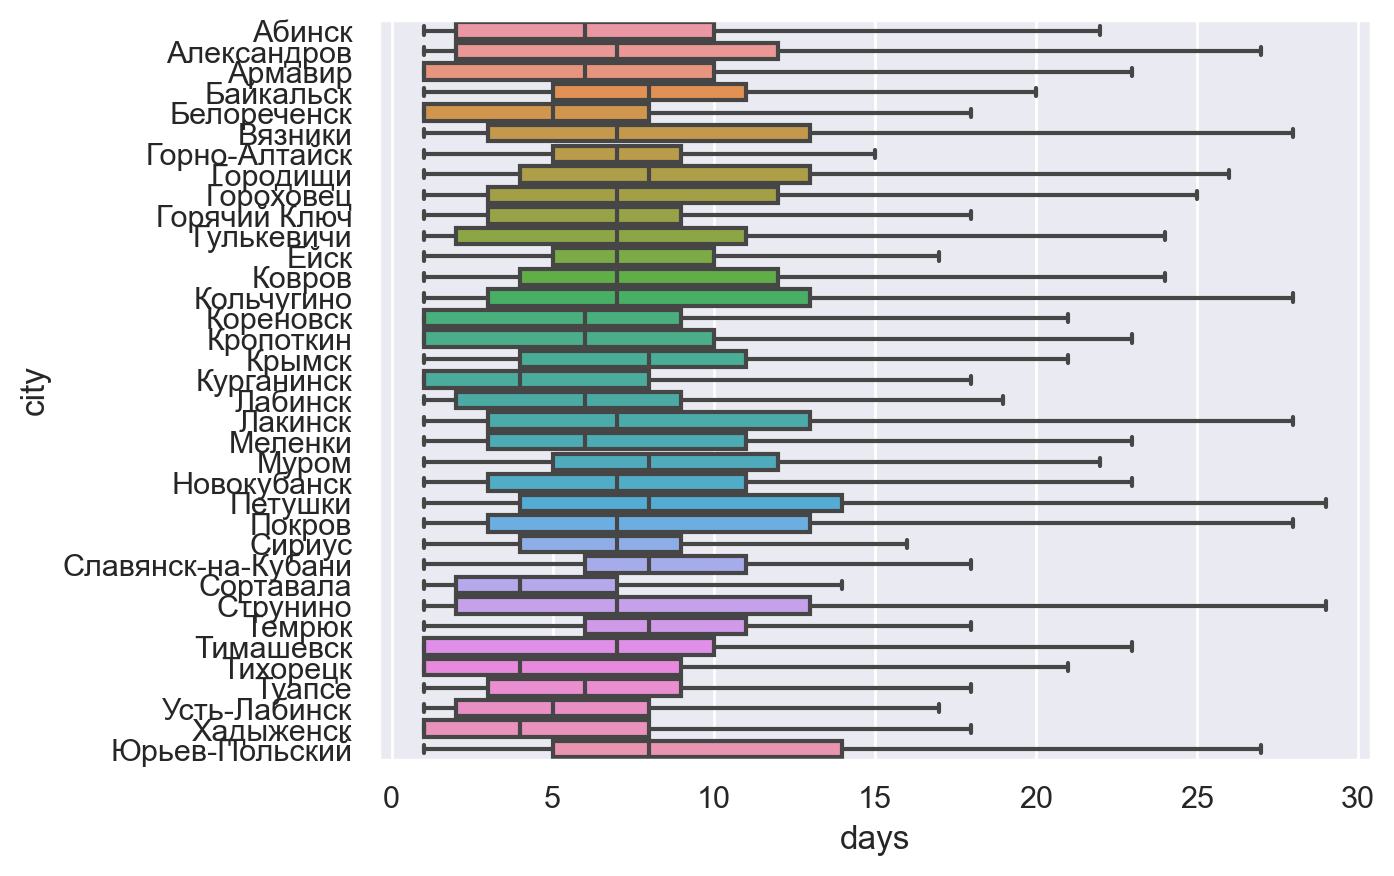

In [ ]:
sns.boxplot(data=df_map, x='days', y='city', showfliers = False)

In [ ]:
import plotly.express as px
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(viz_RU, 
                        lat="lat", 
                        lon="long", 
                        hover_name="city", 
                        hover_data=["volume"],
                        color="city",
                        color_continuous_scale=color_scale,
                        size="volume",
                        zoom=8, 
                        height=700,
                        width=700)

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()